#### In this project we are handling multiple dataset 

In [94]:
import os
import pandas as pd 
import numpy as np
from lets_plot import * # This imports all of ggplot2's functions
LetsPlot.setup_html()
import matplotlib.pyplot as plt

In [95]:
# List all files in the ME204/data/waitrose folder
all_files = [os.path.join('../data/waitrose', file) for file in os.listdir('../data/waitrose') 
             if file.endswith('.csv')]

# Read every single file and concatenate them into a single DataFrame with pandas concat
df = pd.concat((pd.read_csv(file) for file in all_files))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25418 entries, 0 to 1593
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data-product-id        25418 non-null  int64  
 1   data-product-name      25418 non-null  object 
 2   data-product-type      25418 non-null  object 
 3   data-product-on-offer  25418 non-null  bool   
 4   data-product-index     25408 non-null  float64
 5   image-url              25418 non-null  object 
 6   product-page           25418 non-null  object 
 7   product-name           25407 non-null  object 
 8   product-size           25363 non-null  object 
 9   item-price             25407 non-null  object 
 10  price-per-unit         24976 non-null  object 
 11  offer-description      7201 non-null   object 
 12  category               25418 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 2.5+ MB


### Drop the unnecessary data 

In [96]:
df = df.drop_duplicates()

df = df.drop(columns=['data-product-name', 
                      'data-product-type', 
                      'data-product-index', 
                      'offer-description',
                     ])
df = (
    df.rename(columns={
        'data-product-id': 'id',
        'data-product-price': 'price',
        'data-product-on-offer': 'offer',
        'product-page': 'page',
        'product-name': 'name',
        'product-size': 'size',
    })
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25378 entries, 0 to 1593
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              25378 non-null  int64 
 1   offer           25378 non-null  bool  
 2   image-url       25378 non-null  object
 3   page            25378 non-null  object
 4   name            25367 non-null  object
 5   size            25323 non-null  object
 6   item-price      25367 non-null  object
 7   price-per-unit  24936 non-null  object
 8   category        25378 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 1.8+ MB


In [97]:
df

,id,offer,image-url,page,name,size,item-price,price-per-unit,category
0,525635,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Raspberry & Apple Soft Oaty Bars,6x23g,£3.15,£2.29/100g,"Baby, Child & Parent"
1,557746,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Carrot Cake Oaty Bars,6x23g,£3.15,£2.29/100g,"Baby, Child & Parent"
2,32062,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/aptamil...,Aptamil 2 Follow On Milk,800g,£13.50,£16.88/kg,"Baby, Child & Parent"
3,767801,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Baby Wipes,80s,95p,1.2p each,"Baby, Child & Parent"
4,514054,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Apple Rice Cakes,40g,£1.60,£4/100g,"Baby, Child & Parent"
...,...,...,...,...,...,...,...,...,...
1589,18427,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/duchy-o...,Duchy Organic British Lamb Half Leg,Typical weight 0.94kg,£24.31 each est.,£26.00/kg,Waitrose Brands
1590,11606,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/cooks-i...,Cooks' Ingredients Wok Oil,250ml,£2.40,96p/100ml,Waitrose Brands
1591,6903,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/no-1-ba...,No. 1 Badoz Vacherin Du Haut-Doubs AOP French ...,350g,£10.00,£28.58/kg,Waitrose Brands
1592,6125,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/cooks-i...,Cooks' Ingredients White Marzipan,500g,£2.50,£5/kg,Waitrose Brands


#### TASK 01 – DATA CLEANING: There are still a lot of duplicates because many products appear in multiple categories. Revisit the pre-processing code so that each product appears only once in the df DataFrame, following these steps:

#### Reduce the Data Frame so that each row represents a unique product
#### Add a new column categories that contains a list of all categories that the product appears in.
#### Keep a item-price column with the original price of the item.

### ore name of the product multiple categories la erruku 

In [98]:
#Reduce the Data Frame so that each row represents a unique product

df_cleaned = (
    df.groupby('name')
    .agg({
        'category': lambda x: list(x.unique()),  # Combine all unique categories for each product
        'item-price':'first',# Retain the original price of the first occurrence
        'size':'first'
    })
    .reset_index()  # Reset the index to make 'product' a regular column
)

In [99]:
df_cleaned 

,name,category,item-price,size
0,019521 - Essential Flageolet Beans in Water,"[Dietary & Lifestyle, Food Cupboard, Waitrose ...",70p,drained 265g
1,035738 - Solero Exotic Ice cream Lolly,"[Dietary & Lifestyle, Frozen, Summer]",£2.75,270ml
2,044889 - Essential Double Cream Large,"[Fresh & Chilled, Waitrose Brands]",£2.25,600ml
3,060167 - Kronenbourg 1664 Cans,"[Beer, Wine & Spirits]",£5.75,4x440ml
4,086143 - Cooks' Ingredients Garlic,"[Dietary & Lifestyle, Fresh & Chilled, Waitros...",60p,Each
...,...,...,...,...
15413,"£100,000 a Month for a Year Scratchcard",[Home],£5.00,Each
15414,Öpso Japanese Sakura Tree Reed Diffuser,"[Home, Household]",£9.00,50ml
15415,Öpso Mediterranean Citrus Grove Reed Diffuser,"[Home, Household]",£9.00,50ml
15416,Öpso Nordic Birch Forest Reed Diffuser,"[Home, Household]",£9.00,50ml


In [100]:
#Add a new column categories that contains a list of all categories that the product appears 
df_cleaned.rename(columns={'category': 'categories', 'item-price': 'item_price'}, inplace=True)
df_cleaned

,name,categories,item_price,size
0,019521 - Essential Flageolet Beans in Water,"[Dietary & Lifestyle, Food Cupboard, Waitrose ...",70p,drained 265g
1,035738 - Solero Exotic Ice cream Lolly,"[Dietary & Lifestyle, Frozen, Summer]",£2.75,270ml
2,044889 - Essential Double Cream Large,"[Fresh & Chilled, Waitrose Brands]",£2.25,600ml
3,060167 - Kronenbourg 1664 Cans,"[Beer, Wine & Spirits]",£5.75,4x440ml
4,086143 - Cooks' Ingredients Garlic,"[Dietary & Lifestyle, Fresh & Chilled, Waitros...",60p,Each
...,...,...,...,...
15413,"£100,000 a Month for a Year Scratchcard",[Home],£5.00,Each
15414,Öpso Japanese Sakura Tree Reed Diffuser,"[Home, Household]",£9.00,50ml
15415,Öpso Mediterranean Citrus Grove Reed Diffuser,"[Home, Household]",£9.00,50ml
15416,Öpso Nordic Birch Forest Reed Diffuser,"[Home, Household]",£9.00,50ml


In [101]:

def clean_item_price(item_price: str):    
    """
    Cleans the item price string by performing necessary transformations.

    Parameters:
    item_price (str): The item price as a string.

    Returns:
    str: The cleaned item price.
    """
    if 'each est.' in item_price:
        item_price = item_price.replace(' each est.', '')

    if type(item_price) !=str:
        pass
    elif "£" in item_price:
        item_price = item_price.replace('£', '')
    elif 'p' in item_price:
        item_price = item_price.replace('p','')
        item_price = '0.' + item_price

    
    # treat cases with hyphen
    if '-' in item_price:
        item_price = item_price.split('-')[0]
    return float(item_price)
    
    

In [102]:
df_cleaned['item-price-fixed'] = df_cleaned['item_price'].astype(str).apply(clean_item_price)

In [103]:
df_cleaned[['item-price-fixed','item_price']]

,item-price-fixed,item_price
0,0.70,70p
1,2.75,£2.75
2,2.25,£2.25
3,5.75,£5.75
4,0.60,60p
...,...,...
15413,5.00,£5.00
15414,9.00,£9.00
15415,9.00,£9.00
15416,9.00,£9.00


In [104]:
df_cleaned

,name,categories,item_price,size,item-price-fixed
0,019521 - Essential Flageolet Beans in Water,"[Dietary & Lifestyle, Food Cupboard, Waitrose ...",70p,drained 265g,0.70
1,035738 - Solero Exotic Ice cream Lolly,"[Dietary & Lifestyle, Frozen, Summer]",£2.75,270ml,2.75
2,044889 - Essential Double Cream Large,"[Fresh & Chilled, Waitrose Brands]",£2.25,600ml,2.25
3,060167 - Kronenbourg 1664 Cans,"[Beer, Wine & Spirits]",£5.75,4x440ml,5.75
4,086143 - Cooks' Ingredients Garlic,"[Dietary & Lifestyle, Fresh & Chilled, Waitros...",60p,Each,0.60
...,...,...,...,...,...
15413,"£100,000 a Month for a Year Scratchcard",[Home],£5.00,Each,5.00
15414,Öpso Japanese Sakura Tree Reed Diffuser,"[Home, Household]",£9.00,50ml,9.00
15415,Öpso Mediterranean Citrus Grove Reed Diffuser,"[Home, Household]",£9.00,50ml,9.00
15416,Öpso Nordic Birch Forest Reed Diffuser,"[Home, Household]",£9.00,50ml,9.00


## we only take a cucumber products for comparing the brand price for this specific product

# cucumber products

In [105]:
Cucumber_products= df_cleaned[
    (df_cleaned['name'].str.contains("Cucumber", case=False, na=False))]

# Remove the non cucumber products

In [106]:
removed_items=['innocent invigorate, kiwi & cucumber high vitamin fruit super smoothie','james white organic grape, apple, apricot & cu...','Fever-Tree Refreshingly Light Cucumber Tonic','Ferrer Gazpacho Tomato, Pepper, Cucumber Soup','Waitrose Tuna & Cucumber Sub Roll','Aqua Libra Cucumber, Mint & Lime Sparkling Water','Essential 4 in 1 Cucumber Wipes','Dove Advanced Cucumber Anti-Perspirant','Mrs Elswood Cucumber Spears with Dill','Mrs Elswood Haimisha Cucumbers','Belvoir Cucumber & Mint Pressé','TRIP Mindful Blend Cucumber Mint','Waitrose Tuna & Cucumber Sub Roll','Pimentae Cucumber Margarita','Mrs Elswood Sweet Cucumber Slices','Duchy Organic Salad Cucumber']

In [107]:
Cucumber_products = Cucumber_products[~Cucumber_products['name'].str.contains('|'.join(removed_items), case=False, na=False)]

In [108]:
#Cucumber_products= Cucumber_products[~Cucumber_products['name'].isin(removed_items)]

In [109]:
Cucumber_products

,name,categories,item_price,size,item-price-fixed
3571,Duchy Organic Ridge Cucumber,"[Dietary & Lifestyle, Fresh & Chilled, Organic...",£1.65,Each,1.65
4234,Essential Cucumber,"[Beer, Wine & Spirits, Dietary & Lifestyle, Ev...",95p,Each,0.95
4385,Essential Large Cucumber,"[Dietary & Lifestyle, Everyday Value, Fresh & ...",£1.10,Each,1.10
14129,Waitrose Midi Cucumber,"[Dietary & Lifestyle, Summer]",65p,each,0.65


# split the data based on the everyday & non everyday

In [110]:
Cucumber_products['category_type'] = Cucumber_products.apply(lambda row: 'everyday' if 'Everyday Value' in row['categories'] else 'noneveryday', axis=1)

In [111]:
category_counts = Cucumber_products['category_type'].value_counts().reset_index()
category_counts.columns = ['category_type', 'count']
category_counts

,category_type,count
0,noneveryday,2
1,everyday,2


In [112]:
Cucumber_products

,name,categories,item_price,size,item-price-fixed,category_type
3571,Duchy Organic Ridge Cucumber,"[Dietary & Lifestyle, Fresh & Chilled, Organic...",£1.65,Each,1.65,noneveryday
4234,Essential Cucumber,"[Beer, Wine & Spirits, Dietary & Lifestyle, Ev...",95p,Each,0.95,everyday
4385,Essential Large Cucumber,"[Dietary & Lifestyle, Everyday Value, Fresh & ...",£1.10,Each,1.10,everyday
14129,Waitrose Midi Cucumber,"[Dietary & Lifestyle, Summer]",65p,each,0.65,noneveryday


In [113]:
(
    ggplot(Cucumber_products, aes(x='name', y='item-price-fixed')) +
    geom_line(color='red', size=1.2) +
    labs(
        title='Price of cucumber ',
        x='Product Name',
        y='item-price '
    ) +  
    theme(
        axis_text_x=element_text(hjust=1),  
        plot_title=element_text(size=14, face='bold')  
    ) + ggsize(600, 800)
)

In [114]:
Cucumber_product1 = pd.DataFrame(Cucumber_products)

In [115]:
#! pip install plotly

In [116]:
import plotly.express as px

In [117]:
# Sort the DataFrame based on 'item-price-fixed'
Cucumber_products = Cucumber_product1.sort_values(by='item-price-fixed', ascending=False)

# Create the plot using Plotly
fig = px.scatter(
    Cucumber_product1, 
    x='name', 
    y='item-price-fixed', 
    color='size',  # Fill colors based on 'size'
    hover_data={'name': True, 'item-price-fixed': True},  # Data to show on hover
    labels={'item-price-fixed': 'Item Price (£)', 'name': 'Cucumber Name'},
    title='Item Price of Cucumbers (Sorted by Price)',
    template='plotly'
)

# Customize layout for better styling
fig.update_layout(
    xaxis_title="name",
    yaxis_title="Item Price (£)",
    plot_bgcolor='white',
    xaxis_tickangle=-45,
    title_x=0.5,
    title_font_size=19,
    title_font_family="Arial",
    title_font_color="black"
)

# Show the interactive plot
fig.show()


## Taking the every day value dataset from waitrose 

In [118]:
filename = "..\data\waitrose\everyday-value.csv"

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\gthri\AppData\Local\Temp\ipykernel_19032\3487754821.py:1: SyntaxWarning: invalid escape sequence '\d'


In [119]:
value= pd.read_csv(filename)

# Essential

In [120]:
essential_products = value[value['product-name'].str.contains("Essential", case=False, na=False)]

In [121]:
essential_products

,data-product-id,data-product-name,data-product-type,data-product-on-offer,data-product-index,image-url,product-page,product-name,product-size,item-price,price-per-unit,offer-description,category
0,86468,Essential Cucumber,G,False,1,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Cucumber,Each,95p,95p each,NaN,Everyday Value
1,86412,Essential Red Peppers,G,False,2,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Red Peppers,Typical weight 0.16kg,60p each est.,£3.75/kg,NaN,Everyday Value
2,88528,Essential Fairtrade Bananas,G,False,3,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Fairtrade Bananas,5s,95p,19p each,NaN,Everyday Value
3,85115,Essential Onions,G,False,4,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Onions,Typical weight 0.15kg,15p each est.,£1/kg,NaN,Everyday Value
4,88411,Essential Lemons,G,False,5,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Lemons,Each,35p,35p each,NaN,Everyday Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,551848,Essential 24 British Beef Meatballs,G,False,137,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential 24 British Beef Meatballs,400g,£3.60,£9/kg,NaN,Everyday Value
137,776778,Essential Kitchen Wipes,G,False,138,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Kitchen Wipes,36s,£1.10,3.1p each,NaN,Everyday Value
138,6745,Essential Mixed Fruit,G,False,139,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Mixed Fruit,1kg,£3.25,£3.25/kg,NaN,Everyday Value
139,873709,Essential Original Instant Oats,G,False,140,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Original Instant Oats,10x27g,£1.35,50p/100g,NaN,Everyday Value


In [122]:
non_essential_products = value[~value['product-name'].str.contains("Essential", case=False, na=False)]

In [123]:
value['category_type'] = value['product-name'].apply(lambda x: 'Essential' if 'Essential' in x else 'Non-Essential')

### value counts=> unique values mattum dha count pannum and count()=> repeated values errudhalum adha count panni sollum except none value eg: series(1,2,2,2,3,3,3,4,5) we use value_counts [output: 5] , eg:(1,2,2,2,none,none,3) [output: 3]

In [124]:
category_counts = value['category_type'].value_counts().reset_index()
category_counts.columns = ['category_type', 'count']
category_counts

,category_type,count
0,Essential,133
1,Non-Essential,8


In [125]:
bar_plot = ggplot(category_counts, aes(x='category_type', y='count', fill='category_type')) + \
    geom_bar(stat='identity',show_legend=False) + \
    ggtitle('Count of Essential vs Non-Essential Products') + \
    xlab('Product Type') + ylab('Count') + \
    theme_minimal()

In [126]:
bar_plot

In [127]:
value['item_price_fixed'] = value['item-price'].str.replace('p', '').str.replace('£', '').str.replace(',', '').str.replace('each est', '').str.replace('.', '').astype(float)


In [128]:
value['item-price'] = value['item_price_fixed']

In [129]:
value.drop(columns=['item_price_fixed'], inplace=True)

In [130]:
sorted_value_df = value.sort_values(by='item-price', ascending=True)

In [131]:
sorted_value_df

,data-product-id,data-product-name,data-product-type,data-product-on-offer,data-product-index,image-url,product-page,product-name,product-size,item-price,price-per-unit,offer-description,category,category_type
3,85115,Essential Onions,G,False,4,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Onions,Typical weight 0.15kg,15.0,£1/kg,NaN,Everyday Value,Essential
8,85005,Essential Large White Potatoes,G,False,9,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Large White Potatoes,Typical weight 0.28kg,24.0,87p/kg,NaN,Everyday Value,Essential
4,88411,Essential Lemons,G,False,5,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Lemons,Each,35.0,35p each,NaN,Everyday Value,Essential
72,19525,Essential Red Kidney Beans in Water,G,False,73,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Red Kidney Beans in Water,drained 180g,50.0,£2.78/kg,NaN,Everyday Value,Essential
99,6211,Essential Plain White Flour,G,False,100,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Plain White Flour,500g,50.0,£1/kg,NaN,Everyday Value,Essential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,639736,Essential Meat & Fish Selection in Jelly,G,False,135,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Meat & Fish Selection in Jelly,6x400g,480.0,£2/kg,NaN,Everyday Value,Essential
121,670527,Essential Chunks in Jelly Selection,G,False,122,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Chunks in Jelly Selection,6x400g,480.0,£2/kg,NaN,Everyday Value,Essential
89,881209,Coca-Cola Original Taste Can,G,False,90,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/coca-co...,Coca-Cola Original Taste Can,8x330ml,520.0,19.7p/100ml,NaN,Everyday Value,Non-Essential
46,670629,Essential White Ultra Soft Bathroom Tissue,G,False,47,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential White Ultra Soft Bathroom Tissue,16x190 sheets,700.0,23p/100 sheets,NaN,Everyday Value,Essential


# TOP 5 CHEAPEST 

In [132]:
top_5_cheapest = sorted_value_df.head(5)

In [133]:
top_5_cheapest

,data-product-id,data-product-name,data-product-type,data-product-on-offer,data-product-index,image-url,product-page,product-name,product-size,item-price,price-per-unit,offer-description,category,category_type
3,85115,Essential Onions,G,False,4,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Onions,Typical weight 0.15kg,15.0,£1/kg,NaN,Everyday Value,Essential
8,85005,Essential Large White Potatoes,G,False,9,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Large White Potatoes,Typical weight 0.28kg,24.0,87p/kg,NaN,Everyday Value,Essential
4,88411,Essential Lemons,G,False,5,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Lemons,Each,35.0,35p each,NaN,Everyday Value,Essential
72,19525,Essential Red Kidney Beans in Water,G,False,73,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Red Kidney Beans in Water,drained 180g,50.0,£2.78/kg,NaN,Everyday Value,Essential
99,6211,Essential Plain White Flour,G,False,100,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Plain White Flour,500g,50.0,£1/kg,NaN,Everyday Value,Essential


# Taking a first five files

In [134]:
all_files = [os.path.join('../data/waitrose', file) for file in os.listdir('../data/waitrose') 
             if file.endswith('.csv')]

df = pd.concat((pd.read_csv(file) for file in all_files))

In [135]:
first_5_files = all_files[:5]

In [136]:
first_5_files

['../data/waitrose\\baby-child-and-parent.csv',
 '../data/waitrose\\bakery.csv',
 '../data/waitrose\\beer-wine-and-spirits.csv',
 '../data/waitrose\\best-of-british.csv',
 '../data/waitrose\\dietary-and-lifestyle.csv']

### we concat all five 5 file we named as df_others

In [137]:
df_others = pd.concat((pd.read_csv(file) for file in first_5_files), ignore_index=True)

In [138]:
df_others

,data-product-id,data-product-name,data-product-type,data-product-on-offer,data-product-index,image-url,product-page,product-name,product-size,item-price,price-per-unit,offer-description,category
0,525635,Organix Raspberry & Apple Soft Oaty Bars,G,False,1.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Raspberry & Apple Soft Oaty Bars,6x23g,£3.15,£2.29/100g,NaN,"Baby, Child & Parent"
1,557746,Organix Carrot Cake Oaty Bars,G,False,2.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Carrot Cake Oaty Bars,6x23g,£3.15,£2.29/100g,NaN,"Baby, Child & Parent"
2,32062,Aptamil 2 Follow On Milk,G,False,394.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/aptamil...,Aptamil 2 Follow On Milk,800g,£13.50,£16.88/kg,NaN,"Baby, Child & Parent"
3,767801,Essential Baby Wipes,G,False,4.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Baby Wipes,80s,95p,1.2p each,NaN,"Baby, Child & Parent"
4,514054,Organix Apple Rice Cakes,G,False,5.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Apple Rice Cakes,40g,£1.60,£4/100g,NaN,"Baby, Child & Parent"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6254,3926,Seven Seas Cod Liver Oil Maximum Strength,G,False,3336.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/seven-s...,Seven Seas Cod Liver Oil Maximum Strength,60s,£11.55,19.3p each,NaN,Dietary & Lifestyle
6255,3079,Weleda Calendula Nappy Change Cream,G,False,3337.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/weleda-...,Weleda Calendula Nappy Change Cream,75ml,£7.90,£10.54/100ml,NaN,Dietary & Lifestyle
6256,872818,The Uncommon Rosé Bubbly,G,True,3338.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/the-unc...,The Uncommon Rosé Bubbly,25cl,£5.95,£17.85/75cl,Mix & Match Add 4 for 3 Cheapest Item Free,Dietary & Lifestyle
6257,579308,Atelier Mirabeau Pret-A-Porter Rosé to Go,G,True,3339.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/atelier...,Atelier Mirabeau Pret-A-Porter Rosé to Go,25cl,£3.65,£10.95/75cl,Mix & Match Add 4 for 3 Cheapest Item Free,Dietary & Lifestyle


### cleaning the data 

In [139]:
def clean_item_price(item_price: str):    
    """
    Cleans the item price string by performing necessary transformations.

    Parameters:
    item_price (str): The item price as a string.

    Returns:
    str: The cleaned item price.
    """
    if 'each est.' in item_price:
        item_price = item_price.replace('each est.', '')

    if type(item_price) !=str:
        pass
    elif "£" in item_price:
        item_price = item_price.replace('£', '')
    elif 'p' in item_price:
        item_price = item_price.replace('p','')
        item_price = '0.' + item_price

    
    # treat cases with hyphen
    if '-' in item_price:
        item_price = item_price.split('-') [0]
    return float(item_price)

In [140]:
df_others['item-price-fixed'] = df_others['item-price'].astype(str).apply(clean_item_price)

In [141]:
df_others[['item-price-fixed','item-price']]

,item-price-fixed,item-price
0,3.15,£3.15
1,3.15,£3.15
2,13.50,£13.50
3,0.95,95p
4,1.60,£1.60
...,...,...
6254,11.55,£11.55
6255,7.90,£7.90
6256,5.95,£5.95
6257,3.65,£3.65


In [142]:
df_others['item-price'] = df_others ['item-price-fixed']

In [143]:
df_others.drop(columns=['item-price-fixed'],inplace=True)

In [144]:
df_others

,data-product-id,data-product-name,data-product-type,data-product-on-offer,data-product-index,image-url,product-page,product-name,product-size,item-price,price-per-unit,offer-description,category
0,525635,Organix Raspberry & Apple Soft Oaty Bars,G,False,1.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Raspberry & Apple Soft Oaty Bars,6x23g,3.15,£2.29/100g,NaN,"Baby, Child & Parent"
1,557746,Organix Carrot Cake Oaty Bars,G,False,2.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Carrot Cake Oaty Bars,6x23g,3.15,£2.29/100g,NaN,"Baby, Child & Parent"
2,32062,Aptamil 2 Follow On Milk,G,False,394.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/aptamil...,Aptamil 2 Follow On Milk,800g,13.50,£16.88/kg,NaN,"Baby, Child & Parent"
3,767801,Essential Baby Wipes,G,False,4.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Baby Wipes,80s,0.95,1.2p each,NaN,"Baby, Child & Parent"
4,514054,Organix Apple Rice Cakes,G,False,5.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Apple Rice Cakes,40g,1.60,£4/100g,NaN,"Baby, Child & Parent"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6254,3926,Seven Seas Cod Liver Oil Maximum Strength,G,False,3336.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/seven-s...,Seven Seas Cod Liver Oil Maximum Strength,60s,11.55,19.3p each,NaN,Dietary & Lifestyle
6255,3079,Weleda Calendula Nappy Change Cream,G,False,3337.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/weleda-...,Weleda Calendula Nappy Change Cream,75ml,7.90,£10.54/100ml,NaN,Dietary & Lifestyle
6256,872818,The Uncommon Rosé Bubbly,G,True,3338.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/the-unc...,The Uncommon Rosé Bubbly,25cl,5.95,£17.85/75cl,Mix & Match Add 4 for 3 Cheapest Item Free,Dietary & Lifestyle
6257,579308,Atelier Mirabeau Pret-A-Porter Rosé to Go,G,True,3339.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/atelier...,Atelier Mirabeau Pret-A-Porter Rosé to Go,25cl,3.65,£10.95/75cl,Mix & Match Add 4 for 3 Cheapest Item Free,Dietary & Lifestyle


In [145]:
sorted_df_others = df_others.sort_values(by='item-price', ascending=True)

In [146]:
sorted_df_others

,data-product-id,data-product-name,data-product-type,data-product-on-offer,data-product-index,image-url,product-page,product-name,product-size,item-price,price-per-unit,offer-description,category
2927,85125,Essential Carrots,G,False,11.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Carrots,Typical weight 0.14kg,0.10,70p/kg,NaN,Dietary & Lifestyle
2634,85701,Essential Cup Mushrooms,G,False,40.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Cup Mushrooms,Typical weight 0.03kg,0.10,£3.25/kg,NaN,Best of British
3097,85701,Essential Cup Mushrooms,G,False,179.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Cup Mushrooms,Typical weight 0.03kg,0.10,£3.25/kg,NaN,Dietary & Lifestyle
2928,85115,Essential Onions,G,False,12.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Onions,Typical weight 0.15kg,0.15,£1/kg,NaN,Dietary & Lifestyle
2935,85111,Essential Red Onions,G,False,19.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Red Onions,Typical weight 0.17kg,0.17,£1/kg,NaN,Dietary & Lifestyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,574495,No.1 30 Day Dry Aged Jubilee Rib of British Beef,E,False,303.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/no1-30-...,No.1 30 Day Dry Aged Jubilee Rib of British Beef,(6kg-7kg),168.00,£28 / kg,NaN,Best of British
2371,82418,Dom Perignon,W,False,1458.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/dom-per...,Dom Perignon,75cl,199.99,£199.99/75cl,NaN,"Beer, Wine & Spirits"
2435,17830,Louis Roederer Cristal Vintage Champagne,W,False,1522.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/louis-r...,Louis Roederer Cristal Vintage Champagne,75cl,299.99,£299.99/75cl,NaN,"Beer, Wine & Spirits"
2965,85201,Essential Leeks,G,False,NaN,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,NaN,NaN,NaN,NaN,NaN,Dietary & Lifestyle


In [147]:
top_5_cheapest_others = sorted_df_others.head(5)

In [148]:
top_5_cheapest_others

,data-product-id,data-product-name,data-product-type,data-product-on-offer,data-product-index,image-url,product-page,product-name,product-size,item-price,price-per-unit,offer-description,category
2927,85125,Essential Carrots,G,False,11.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Carrots,Typical weight 0.14kg,0.10,70p/kg,NaN,Dietary & Lifestyle
2634,85701,Essential Cup Mushrooms,G,False,40.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Cup Mushrooms,Typical weight 0.03kg,0.10,£3.25/kg,NaN,Best of British
3097,85701,Essential Cup Mushrooms,G,False,179.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Cup Mushrooms,Typical weight 0.03kg,0.10,£3.25/kg,NaN,Dietary & Lifestyle
2928,85115,Essential Onions,G,False,12.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Onions,Typical weight 0.15kg,0.15,£1/kg,NaN,Dietary & Lifestyle
2935,85111,Essential Red Onions,G,False,19.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Red Onions,Typical weight 0.17kg,0.17,£1/kg,NaN,Dietary & Lifestyle


# we taking the both others and everyday top_5 cheapest products we compare it 

In [149]:
plot_others = top_5_cheapest_others[['product-name','item-price','category']]

In [150]:
plot_everyday= top_5_cheapest[['product-name','item-price','category']]

In [151]:
plot_others

,product-name,item-price,category
2927,Essential Carrots,0.10,Dietary & Lifestyle
2634,Essential Cup Mushrooms,0.10,Best of British
3097,Essential Cup Mushrooms,0.10,Dietary & Lifestyle
2928,Essential Onions,0.15,Dietary & Lifestyle
2935,Essential Red Onions,0.17,Dietary & Lifestyle


In [152]:
plot_everyday

,product-name,item-price,category
3,Essential Onions,15.0,Everyday Value
8,Essential Large White Potatoes,24.0,Everyday Value
4,Essential Lemons,35.0,Everyday Value
72,Essential Red Kidney Beans in Water,50.0,Everyday Value
99,Essential Plain White Flour,50.0,Everyday Value


In [153]:
combined_df = pd.concat([plot_everyday, plot_others], ignore_index=True)

In [154]:
combined_df

,product-name,item-price,category
0,Essential Onions,15.00,Everyday Value
1,Essential Large White Potatoes,24.00,Everyday Value
2,Essential Lemons,35.00,Everyday Value
3,Essential Red Kidney Beans in Water,50.00,Everyday Value
4,Essential Plain White Flour,50.00,Everyday Value
5,Essential Carrots,0.10,Dietary & Lifestyle
6,Essential Cup Mushrooms,0.10,Best of British
7,Essential Cup Mushrooms,0.10,Dietary & Lifestyle
8,Essential Onions,0.15,Dietary & Lifestyle
9,Essential Red Onions,0.17,Dietary & Lifestyle


# ploting the everyday value and others 

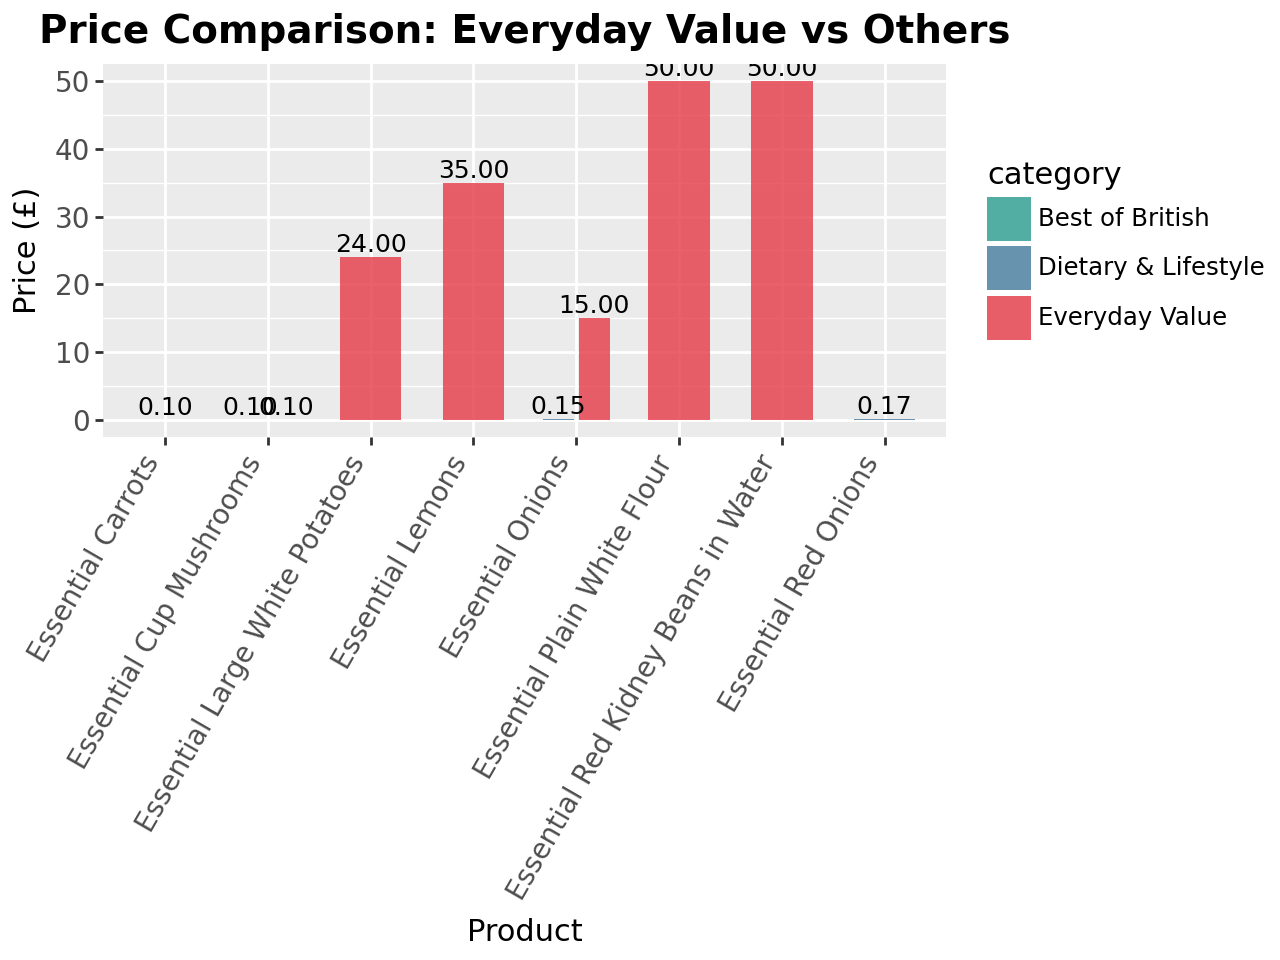

In [ ]:
from plotnine import ggplot, aes, geom_bar, geom_text, theme, element_text, ggtitle, labs, scale_fill_manual, position_dodge

# Define custom colors for better differentiation
category_colors = {"Everyday Value": "#E63946", "Dietary & Lifestyle": "#457B9D", "Best of British": "#2A9D8F"}

# Define dodge position
dodge_position = position_dodge(width=0.7)  # Ensures proper alignment ,position is a bar width

plot_combined = (
    ggplot(combined_df, aes(x='product-name', y='item-price', fill='category')) +
    geom_bar(stat='identity', position=dodge_position, width=0.6, alpha=0.8) +  # Adjust width and transparency
    geom_text(aes(label='item-price'), position=dodge_position, va='bottom', size=9, format_string='{:.2f}') +  # Fix text positioning
    ggtitle('Price Comparison: Everyday Value vs Others') +
    labs(x='Product', y='Price (£)') +
    scale_fill_manual(values=category_colors) +  # Custom color mapping
    theme(
        axis_text_x=element_text(angle=60, hjust=1, size=10),  # Improved label rotation
        axis_text_y=element_text(size=10),
        plot_title=element_text(size=14, face="bold")
    )
)

plot_combined



1. **Everyday Value products** have significantly higher prices than others.  
2. **Dietary & Lifestyle and Best of British** categories have very low prices (≤ 0.17).  
3. **Red Kidney Beans & White Flour** are the most expensive items (£50 each).  
4. **Price variation is large**, ranging from £0.10 to £50.  
5. **Most affordable** products are mushrooms, carrots, and onions. 